In [2]:
!ls

gdrive	sample_data


In [ ]:
!pip install python-resize-image
!pip install opencv-python
!pip install scikit-image
!pip install pillow
!pip install pixellib

In [3]:
from google.colab import files
from google.colab import drive
import pandas as pd
import numpy as np
import sklearn
#import split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import cluster
from resizeimage import resizeimage
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras import backend as K
import seaborn as sns
import os
import json
import re
from zipfile import ZipFile
from __future__ import print_function
import argparse
import time
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set the randomizer seed so results are the same each time.
np.random.seed(0)


# optional: mount Google Drive
drive.mount('/content/gdrive/',force_remount=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive/


In [4]:
def recall(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall

    def precision(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/

/content/gdrive/.shortcut-targets-by-id/1iHTpj2EYU7rPqwkV6Lo-R-V5jTqIBIKA/Capstone Project/BigEarthNet


In [6]:
with ZipFile('bigearthnet-tools.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('bigearthnet-tools')

with ZipFile('K-BranchCNN.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('K-BranchCNN')

In [7]:
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/

/content/gdrive/.shortcut-targets-by-id/1iHTpj2EYU7rPqwkV6Lo-R-V5jTqIBIKA/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0


In [8]:
!python "/content/gdrive/My Drive/Capstone Project/BigEarthNet/bigearthnet-tools/bigearthnet-tools-master/scripts/read_patch.py" -p "/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/S2B_MSIL2A_20170818T112109_0_77/"

args Namespace(patch_folder='/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/S2B_MSIL2A_20170818T112109_0_77/', root_folder=None)
INFO: GDAL package will be used to read GeoTIFF files
INFO: band B01 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (20, 20)
INFO: band B02 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (120, 120)
INFO: band B03 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (120, 120)
INFO: band B04 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (120, 120)
INFO: band B05 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (60, 60)
INFO: band B06 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (60, 60)
INFO: band B07 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (60, 60)
INFO: band B08 of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (120, 120)
INFO: band B8A of patch S2B_MSIL2A_20170818T112109_0_77 is ready with size (60, 60)
INFO: band B0

If resizing images, it might be beneficial to reduce to (20,20)

##### Examples of Permanently Irrigated Land

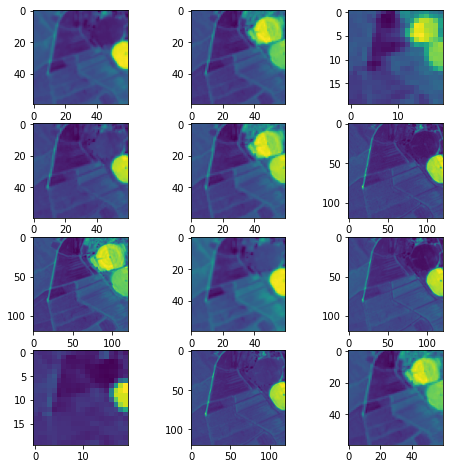

In [58]:
directory='S2A_MSIL2A_20171121T112351_11_73'#'S2A_MSIL2A_20171201T112431_50_5'
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 4
i=1
for image_file in list(filter(lambda x: x[-4:]=='.tif', os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/' % (directory)))):
    img = Image.open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (directory,image_file))
    fig.add_subplot(rows, columns, i)
    i+=1
    plt.imshow(img)
plt.show()

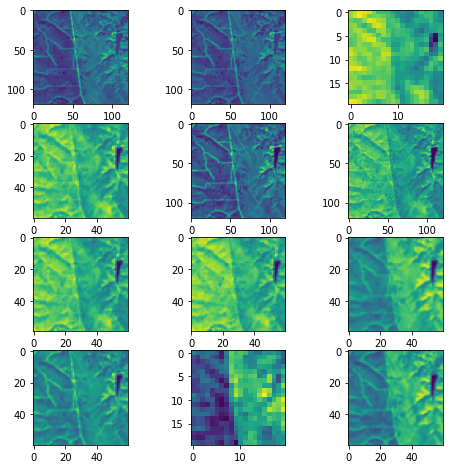

In [59]:
directory='S2A_MSIL2A_20171201T112431_50_5'
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 4
i=1
for image_file in list(filter(lambda x: x[-4:]=='.tif', os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/' % (directory)))):
    img = Image.open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (directory,image_file))
    fig.add_subplot(rows, columns, i)
    i+=1
    plt.imshow(img)
plt.show()

In [10]:
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/

/content/gdrive/.shortcut-targets-by-id/1iHTpj2EYU7rPqwkV6Lo-R-V5jTqIBIKA/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0


### Sklearn Models Using First Three Layers (reduced modified size)

In [11]:
file_list=os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/')
irrigation=[]
tif_arrays=[]

labels_df=pd.DataFrame(columns=['Directory','Label','coord_lrx','coord_lry','coord_ulx','coord_uly','acquisition_date'])
j=0
for file in file_list[:5000]:

  print(j)
  j+=1
  try:
    i=1
    json_load=json.load(open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (file,file+'_labels_metadata.json') ))
    label_list=json_load['labels']
    coords=json_load['coordinates']
    if 'Permanently irrigated land' in label_list:
      irrigation+=[1]
    else:
      irrigation+=[0]
  except:
    i=0
    print('%s does not have a label metadata file' % file)

  if i==1: 
    layer_list=[]
    
    for tif_file in list(filter(lambda x: x[-4:]=='.tif', os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/' % (file)))):
      im = Image.open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (file,tif_file))
      im=np.array(im)
      im.resize((20, 20))
      layer_list+=[im]
    layer_list=np.array(layer_list)
    tif_arrays.append(layer_list)



Streaming output truncated to the last 5000 lines.
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301


In [12]:
irrigation=np.array(irrigation)
first_layers=np.array([np.concatenate([x[0],x[1],x[2],x[3]],axis=1) for x in tif_arrays])

dev_data, dev_labels = np.array([x for x in first_layers[4000:]]), irrigation[4000:]
train_data, train_labels = np.array([x for x in first_layers[:4000]]), irrigation[:4000]

In [ ]:
nsamples, nx, ny = train_data.shape
d2_train_dataset = train_data.reshape((nsamples,nx*ny))

nsamples, nx, ny = dev_data.shape
d2_dev_dataset = dev_data.reshape((nsamples,nx*ny))

In [ ]:
def KNN(k_values):

    for k in k_values: #iterating through k values 
        neigh = KNeighborsClassifier(n_neighbors=k) #creating classifier with different k values
        neigh.fit(d2_train_dataset, train_labels) #fitting data
        prediction=neigh.predict(d2_dev_dataset) #predicting with dev_data
        target_names=[str(i) for i in [0,1]]
        print("K=%s\n" %k)
        print(classification_report(dev_labels, prediction, target_names=target_names)) #printing classification report to get key results
    
k_values = [1, 3, 5, 7, 9]
KNN(k_values)

def multinomial(alpha_values):      
    N=len(d2_train_dataset)  
    opt_alpha=round(1/N,4)
    for alpha in alpha_values+[opt_alpha]:
        multinomial_model = MultinomialNB(alpha=alpha) #creating model
        multinomial_model.fit(d2_train_dataset, train_labels) #fitting model
        multinomial_dev_predict=multinomial_model.predict(d2_dev_dataset) #using dev data to predict
        
        f1score=metrics.f1_score(dev_labels, multinomial_dev_predict, average='weighted')
        print("Naive bayes model F1_score for alpha={}: {}".format(alpha,f1score))

alpha_values=[0.0001,0.001, 0.01, 0.1, 1.0, 10.0]
multinomial(alpha_values)

def logistic_regression(c_values):
    N=len(d2_train_dataset)
    opt_c=np.sqrt(N)
    for c in c_values+[opt_c]:
        log_model=LogisticRegression(penalty='l2', solver='liblinear',multi_class='auto',C=c,max_iter=10000)
        log_model.fit(d2_train_dataset,train_labels)
        weights=log_model.coef_

        sum_sq_dict={x:sum(i*i for i in weights[x]) for x in range(len(weights))}
        prediction=log_model.predict(d2_dev_dataset) #predicting with dev_data
        f1score=metrics.f1_score(dev_labels, prediction, average='weighted')
        print("Logistic regression model F1_score for C={}: {}".format(c,f1score))
        print("Sum squared weights for logistic regression model with C={}:{}".format(c,sum_sq_dict))
        target_names=[str(i) for i in [0,1]]
        print(classification_report(dev_labels, prediction, target_names=target_names)) #printing classification report to get key results
    

c_values=[0.0001,0.001,0.0055, 0.01, 0.1, 1.0, 10.0]
logistic_regression(c_values)

K=1

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.97       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.97      0.97       147

K=3

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=5

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=7

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=9

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive bayes model F1_score for alpha=0.0001: 0.6977817213842059
Naive bayes model F1_score for alpha=0.001: 0.6977817213842059
Naive bayes model F1_score for alpha=0.01: 0.6977817213842059
Naive bayes model F1_score for alpha=0.1: 0.6977817213842059
Naive bayes model F1_score for alpha=1.0: 0.6977817213842059
Naive bayes model F1_score for alpha=10.0: 0.6977817213842059
Naive bayes model F1_score for alpha=0.0013: 0.6977817213842059
Logistic regression model F1_score for C=0.0001: 0.9556993529118966
Sum squared weights for logistic regression model with C=0.0001:{0: 2.798668212450068e-05}
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.00      0.00      0.00         3

    accuracy                           0.95       147
   macro avg       0.49      0.49      0.49       147
weighted avg       0.96      0.95      0.96       147



KeyboardInterrupt: ignored

### Basic CNN

In [ ]:
train_data=np.array(train_data)
train_data.shape

(800, 120, 480)

In [ ]:
train_data=np.array(train_data)
dev_data=np.array(dev_data)
X_train = train_data.reshape(train_data.shape[0], 20, 20, 4)
X_dev = dev_data.reshape(dev_data.shape[0], 20, 20, 4)
X_train = X_train.astype('float32')
X_dev = X_dev.astype('float32')

X_train /= 255
X_dev /= 255

Y_train = np_utils.to_categorical(train_labels, 2)
Y_dev = np_utils.to_categorical(dev_labels, 2)

In [ ]:
#Sequential model
model = Sequential()

#convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(120, 120, 4)))

#convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

# flatten output of convolutional layer
model.add(Flatten())

# hidden layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(2, activation='softmax'))

# compiling sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy',f1,precision,recall], optimizer='adam')

# training the model with data
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_dev, Y_dev))

Y_test = np.argmax(Y_dev, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_dev)
print(classification_report(Y_test, y_pred))

Epoch 1/10
7/7 [==============================] - 108s 15s/step - loss: 3.3761 - accuracy: 0.8988 - f1: 0.9096 - precision: 0.9096 - recall: 0.9096 - val_loss: 0.2301 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 2/10
7/7 [==============================] - 108s 15s/step - loss: 0.3574 - accuracy: 0.9388 - f1: 0.9453 - precision: 0.9453 - recall: 0.9453 - val_loss: 0.1984 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 3/10
7/7 [==============================] - 108s 15s/step - loss: 0.1913 - accuracy: 0.9825 - f1: 0.9844 - precision: 0.9844 - recall: 0.9844 - val_loss: 0.1716 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 4/10
7/7 [==============================] - 107s 15s/step - loss: 0.2295 - accuracy: 0.9825 - f1: 0.9810 - precision: 0.9810 - recall: 0.9810 - val_loss: 0.2133 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#120 x 120 only
file_list=os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/')
irrigation=[]
tif_arrays=[]

labels_df=pd.DataFrame(columns=['Directory','Label','coord_lrx','coord_lry','coord_ulx','coord_uly','acquisition_date'])
j=0
for file in file_list[:1000]:

  print(j)
  j+=1
  try:
    i=1
    json_load=json.load(open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (file,file+'_labels_metadata.json') ))
    label_list=json_load['labels']
    coords=json_load['coordinates']
    if 'Permanently irrigated land' in label_list:
      irrigation+=[1]
    else:
      irrigation+=[0]
  except:
    i=0
    print('%s does not have a label metadata file' % file)

  if i==1: 
    layer_list=[]
    
    for tif_file in list(filter(lambda x: x[-4:]=='.tif', os.listdir('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/' % (file)))):
      im = Image.open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (file,tif_file))
      im=np.array(im)
      if im.shape==(120,120):
        layer_list+=[im]
    layer_list=np.array(layer_list)
    if layer_list.shape==(4, 120, 120):
      tif_arrays.append(layer_list)
    else:
      irrigation = irrigation[: len(irrigation) - 1] 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [82]:
irrigation=np.array(irrigation)
tif_arrays=np.array(tif_arrays)
first_layers=np.array([np.concatenate(x,axis=1) for x in tif_arrays])

dev_data, dev_labels = np.array([x for x in first_layers[800:]]), irrigation[800:]
train_data, train_labels = np.array([x for x in first_layers[:800]]), irrigation[:800]

In [84]:
nsamples, nx, ny = train_data.shape
d2_train_dataset = train_data.reshape((nsamples,nx*ny))

nsamples, nx, ny = dev_data.shape
d2_dev_dataset = dev_data.reshape((nsamples,nx*ny))

In [85]:
def KNN(k_values):

    for k in k_values: #iterating through k values 
        neigh = KNeighborsClassifier(n_neighbors=k) #creating classifier with different k values
        neigh.fit(d2_train_dataset, train_labels) #fitting data
        prediction=neigh.predict(d2_dev_dataset) #predicting with dev_data
        target_names=[str(i) for i in [0,1]]
        print("K=%s\n" %k)
        print(classification_report(dev_labels, prediction, target_names=target_names)) #printing classification report to get key results
    
k_values = [1, 3, 5, 7, 9]
KNN(k_values)

def multinomial(alpha_values):      
    N=len(d2_train_dataset)  
    opt_alpha=round(1/N,4)
    for alpha in alpha_values+[opt_alpha]:
        multinomial_model = MultinomialNB(alpha=alpha) #creating model
        multinomial_model.fit(d2_train_dataset, train_labels) #fitting model
        multinomial_dev_predict=multinomial_model.predict(d2_dev_dataset) #using dev data to predict
        
        f1score=metrics.f1_score(dev_labels, multinomial_dev_predict, average='weighted')
        print("Naive bayes model F1_score for alpha={}: {}".format(alpha,f1score))

alpha_values=[0.0001,0.001, 0.01, 0.1, 1.0, 10.0]
multinomial(alpha_values)

def logistic_regression(c_values):
    N=len(d2_train_dataset)
    opt_c=np.sqrt(N)
    for c in c_values+[opt_c]:
        log_model=LogisticRegression(penalty='l2', solver='liblinear',multi_class='auto',C=c,max_iter=10000)
        log_model.fit(d2_train_dataset,train_labels)
        weights=log_model.coef_

        sum_sq_dict={x:sum(i*i for i in weights[x]) for x in range(len(weights))}
        prediction=log_model.predict(d2_dev_dataset) #predicting with dev_data
        f1score=metrics.f1_score(dev_labels, prediction, average='weighted')
        print("Logistic regression model F1_score for C={}: {}".format(c,f1score))
        print("Sum squared weights for logistic regression model with C={}:{}".format(c,sum_sq_dict))
        target_names=[str(i) for i in [0,1]]
        print(classification_report(dev_labels, prediction, target_names=target_names)) #printing classification report to get key results
    

c_values=[0.0001,0.001,0.0055, 0.01, 0.1, 1.0, 10.0]
logistic_regression(c_values)

K=1

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.97       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.97      0.97       147

K=3

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=5

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=7

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K=9

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.00      0.00      0.00         3

    accuracy                           0.98       147
   macro avg       0.49      0.50      0.49       147
weighted avg       0.96      0.98      0.97       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive bayes model F1_score for alpha=0.0001: 0.6977817213842059
Naive bayes model F1_score for alpha=0.001: 0.6977817213842059
Naive bayes model F1_score for alpha=0.01: 0.6977817213842059
Naive bayes model F1_score for alpha=0.1: 0.6977817213842059
Naive bayes model F1_score for alpha=1.0: 0.6977817213842059
Naive bayes model F1_score for alpha=10.0: 0.6977817213842059
Naive bayes model F1_score for alpha=0.0013: 0.6977817213842059
Logistic regression model F1_score for C=0.0001: 0.9556993529118966
Sum squared weights for logistic regression model with C=0.0001:{0: 2.798668212450068e-05}
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.00      0.00      0.00         3

    accuracy                           0.95       147
   macro avg       0.49      0.49      0.49       147
weighted avg       0.96      0.95      0.96       147



KeyboardInterrupt: ignored

### Basic CNN

In [86]:
train_data=np.array(train_data)
train_data.shape

(800, 120, 480)

In [87]:
train_data=np.array(train_data)
dev_data=np.array(dev_data)
X_train = train_data.reshape(train_data.shape[0], 120, 120, 4)
X_dev = dev_data.reshape(dev_data.shape[0], 120, 120, 4)
X_train = X_train.astype('float32')
X_dev = X_dev.astype('float32')

X_train /= 255
X_dev /= 255

Y_train = np_utils.to_categorical(train_labels, 2)
Y_dev = np_utils.to_categorical(dev_labels, 2)

In [89]:
#Sequential model
model = Sequential()

#convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(120, 120, 4)))

#convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

# flatten output of convolutional layer
model.add(Flatten())

# hidden layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(2, activation='softmax'))

# compiling sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy',f1,precision,recall], optimizer='adam')

# training the model with data
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_dev, Y_dev))

Y_test = np.argmax(Y_dev, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_dev)
print(classification_report(Y_test, y_pred))

Epoch 1/10
7/7 [==============================] - 108s 15s/step - loss: 3.3761 - accuracy: 0.8988 - f1: 0.9096 - precision: 0.9096 - recall: 0.9096 - val_loss: 0.2301 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 2/10
7/7 [==============================] - 108s 15s/step - loss: 0.3574 - accuracy: 0.9388 - f1: 0.9453 - precision: 0.9453 - recall: 0.9453 - val_loss: 0.1984 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 3/10
7/7 [==============================] - 108s 15s/step - loss: 0.1913 - accuracy: 0.9825 - f1: 0.9844 - precision: 0.9844 - recall: 0.9844 - val_loss: 0.1716 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883
Epoch 4/10
7/7 [==============================] - 107s 15s/step - loss: 0.2295 - accuracy: 0.9825 - f1: 0.9810 - precision: 0.9810 - recall: 0.9810 - val_loss: 0.2133 - val_accuracy: 0.9796 - val_f1: 0.9883 - val_precision: 0.9883 - val_recall:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Basic Semantic Segmentation (Lancover AI)

In [27]:
%cd /content/gdrive/My Drive/


/content/gdrive/My Drive


In [38]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc('/content/gdrive/My Drive/Capstone Project/landcover.ai/images/M-33-7-A-d-2-3.tiff', output_image_name = '/content/gdrive/My Drive/Capstone Project/landcover.ai/images/segment_M-33-7-A-d-2-3.tiff')

Processed Image saved successfuly in your current working directory.


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0

In [1]:
# img=Image.open('/content/gdrive/My Drive/Capstone Project/landcover.ai/images/segment_M-33-7-A-d-2-3.tiff')
# img

In [ ]:
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/S2B_MSIL2A_20180515T112110_16_2

In [ ]:
labels_df=pd.read_csv('labels_by_extracted_directory.csv')
labels_df.head()

In [ ]:
'''os.listdir()[0]
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/S2B_MSIL2A_20180515T112110_16_21
%cat S2B_MSIL2A_20180515T112110_16_21_labels_metadata.json
labels_df=pd.read_csv('labels_by_extracted_directory.csv')
labels_df=pd.DataFrame(columns=['Directory','Label','coord_lrx','coord_lry','coord_ulx','coord_uly','acquisition_date'])
for file in file_list:
  try:
    json_load=json.load(open('/content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/%s/%s' % (file,file+'_labels_metadata.json') ))
    label_list=json_load['labels']
    coords=json_load['coordinates']
    for label in label_list:
      labels_df=labels_df.append({'Directory' : file, 'Label' :label,
                                  'coord_lrx':coords['lrx'],'coord_lry':coords['lry'],
                                  'coord_ulx':coords['ulx'],'coord_uly':coords['uly'],
                                  'acquisition_date':json_load['acquisition_date']},  
                  ignore_index = True)
  except:
    print('%s does not have a label metadata file' % file)
label_count=labels_df[['Label','Directory']].groupby(['Label']).count().reset_index()
label_count=label_count.sort_values(by='Directory',ascending=False).reset_index()
plt.figure(figsize=(20,10))
chart = sns.barplot(x="Label", y="Directory", data=label_count,color='lightblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Frequency of Labels')
%cd /content/gdrive/My Drive/Capstone Project/BigEarthNet/extracted_files/BigEarthNet-v1.0/
labels_df.to_csv("labels_by_extracted_directory.csv")
labels_df.head()'''